# Extracting Business Value and Insight through Tripadvisor Dataset
*Marc Medina*

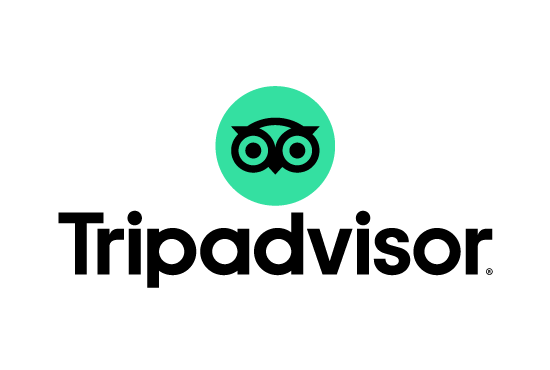

## Introduction
Tripadvisor is a user friendly website and app used to plan future trips by looking through various travel sites as well as restaurants, hotels, flights and much more. The data is a set of text-based customer reviews which is accompanied by a numerical rating on a scale of **1-5** with **1** being the worst and **5** being the best.

### Goal and Business Use
Given the [dataset](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews) from Kaggle.com, the task is to take data, split into a test and training categories, and predict the numerical rating given the text. Additionally,understanding reviews, and more particularly keywords, which desribe a customers experience may be invaluable from a business perspective since reviews can act as a starting point of improvement which will be brought to attention during the unsupervised learning analysis.

In [2]:
# import all neccessary components
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### A gentle introduction to the packages used
To start, I used pandas to read in the immediate data in order to cleanly interpret the data and further be used for exploratory data analysis. Then, the train_test_split function from scikit-learn was used to efficiently split the dataset into 70% training and 30% testing. Furthermore, the CountVectorizer and TfidfVectorizer functions were needed to convert text data into a useable matrix for the machine learning models (preprocessing). As I have past experience with advanced statistics, I chose a probabilistics classifier which uses Bayes' theorem called MultinomialNB as the first supervised learning model. Additionally, for each model the accuracy_score function was used throughout each model to evaluate the accuracy. The rest of the models used are Support Vector Machine classifier, Random Forest, Latent Dirichlet Allocation, and K-Means clustering which later will be further addressed.

## Data Loading, Processing, and Exploratory Analysis

In [3]:
# initial read
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Data Visualization
The histogram below helps to display a general description of the review data before jumping into immediate model building. As shown, the encouraging four and five rating are dominant over the negative one through three star reviews.

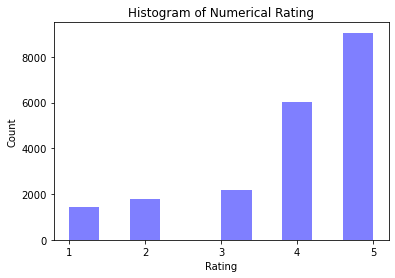

In [5]:
# Create a histogram of numerical rating
plt.hist(df['Rating'], align='mid', color='blue', alpha=0.5)

# Set the x-axis ticks and labels to integer values
plt.xticks(range(1, 6))

# Set the title and labels
plt.title('Histogram of Numerical Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.show()

In [6]:
# split into training and test data (As stated 70/30)
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.3, random_state=42)

In [7]:
# preprocess data using CountVectorizer used for supervised models
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# preprocess data using TfidfVectorizer used for unsupervised models
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'])

## Supervised Learning Models
As previously mentioned, a meaningful supervised learning problem for this dataset could be predicting the rating of a hotel review based on the text of the review which would then may provide extremely benefit to stakeholders interested in the hotel profits.

### Multinomial Naive Bayes classifier
The [Multinomial Naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) is the initial model used in the analysis. This algorithm takes into account the frequency of each word in a category and uses that information to determine the likelihood of the text belonging to a specific category. The highest likelihood that the text has is then assigned to a given piece of text. I chose this statistical method, as I have familarity from previous statsitical coursework and felt it would make for an accurate model. The general idea of the the Naive Bayes classifier is depicted in the image below. Additionally, the implementation of the model is quite simple and shown in the code.

#### Probabilistic Description of Naive Bayes
In general, the probability of observing a feature $x_i$ in a particular class $c_j$ is given by:

$$P(x_i \mid c_j) = \frac{N_{i,j} + \alpha}{\sum_{k=1}^{|V|}(N_{k,j} + \alpha)}$$

where $N_{i,j}$ is the number of times feature $i$ appears in documents of class $j$, $|V|$ is the vocabulary size, and $\alpha$ is the smoothing parameter.

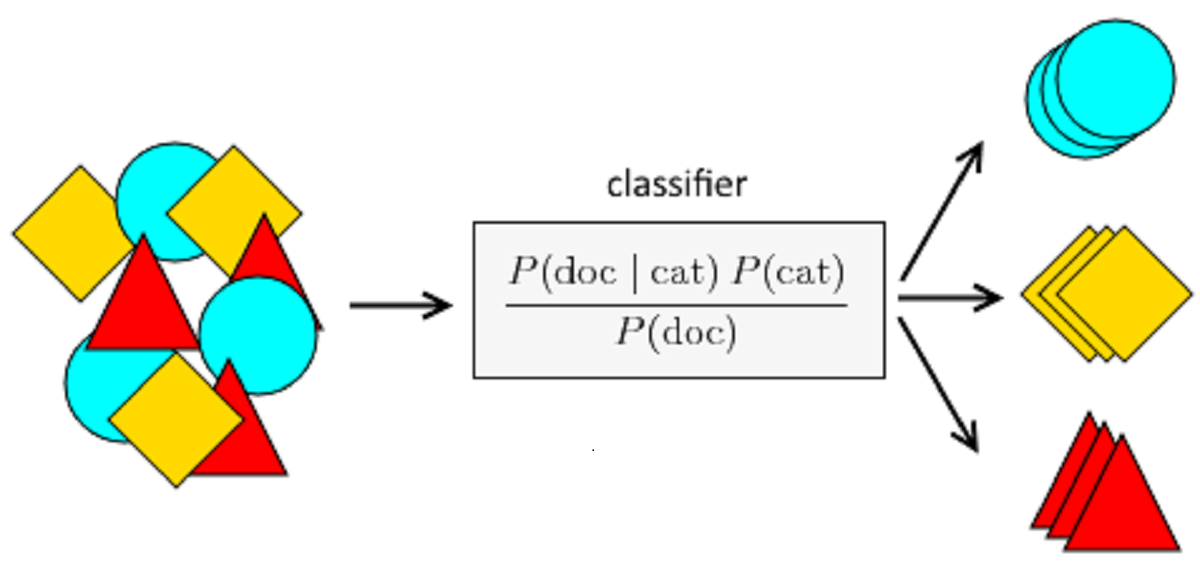

In [8]:
# Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Multinomial Naive Bayes Classifier:', accuracy)

Accuracy of Multinomial Naive Bayes Classifier: 0.5653871177618738


### [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html)
The Support Vector Machines method is used and applied to this text data by searching for the best possible boundary which maximizes the distance between the hyperplane and the closest data points from each individual text class. The linearity of the support vector machine classifier can further be used for our multi-class classification of the text data. Below is a more visual depiction of a simple version of the model at work. 

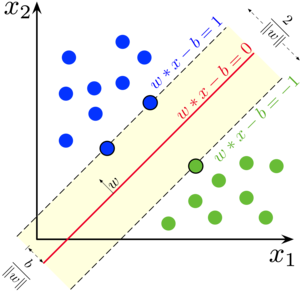

In [9]:
# create and train a Linear SVM classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# make predictions on test data
y_pred = clf.predict(X_test)

# evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SVM Model:', accuracy)

Accuracy of SVM Model: 0.5494469746258946


/Users/marcmedina/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest
The last model used in the supervised learning section of this project is the ensembling learning method of the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). This type of method is built off of decision trees which are essential branches that follow true-false statements. To make a prediction, the Random Forest runs through each piece of text and counts the number of trees that predict each class. Further visualizations and comparision from Decision Tree to Random Forest are shown below.

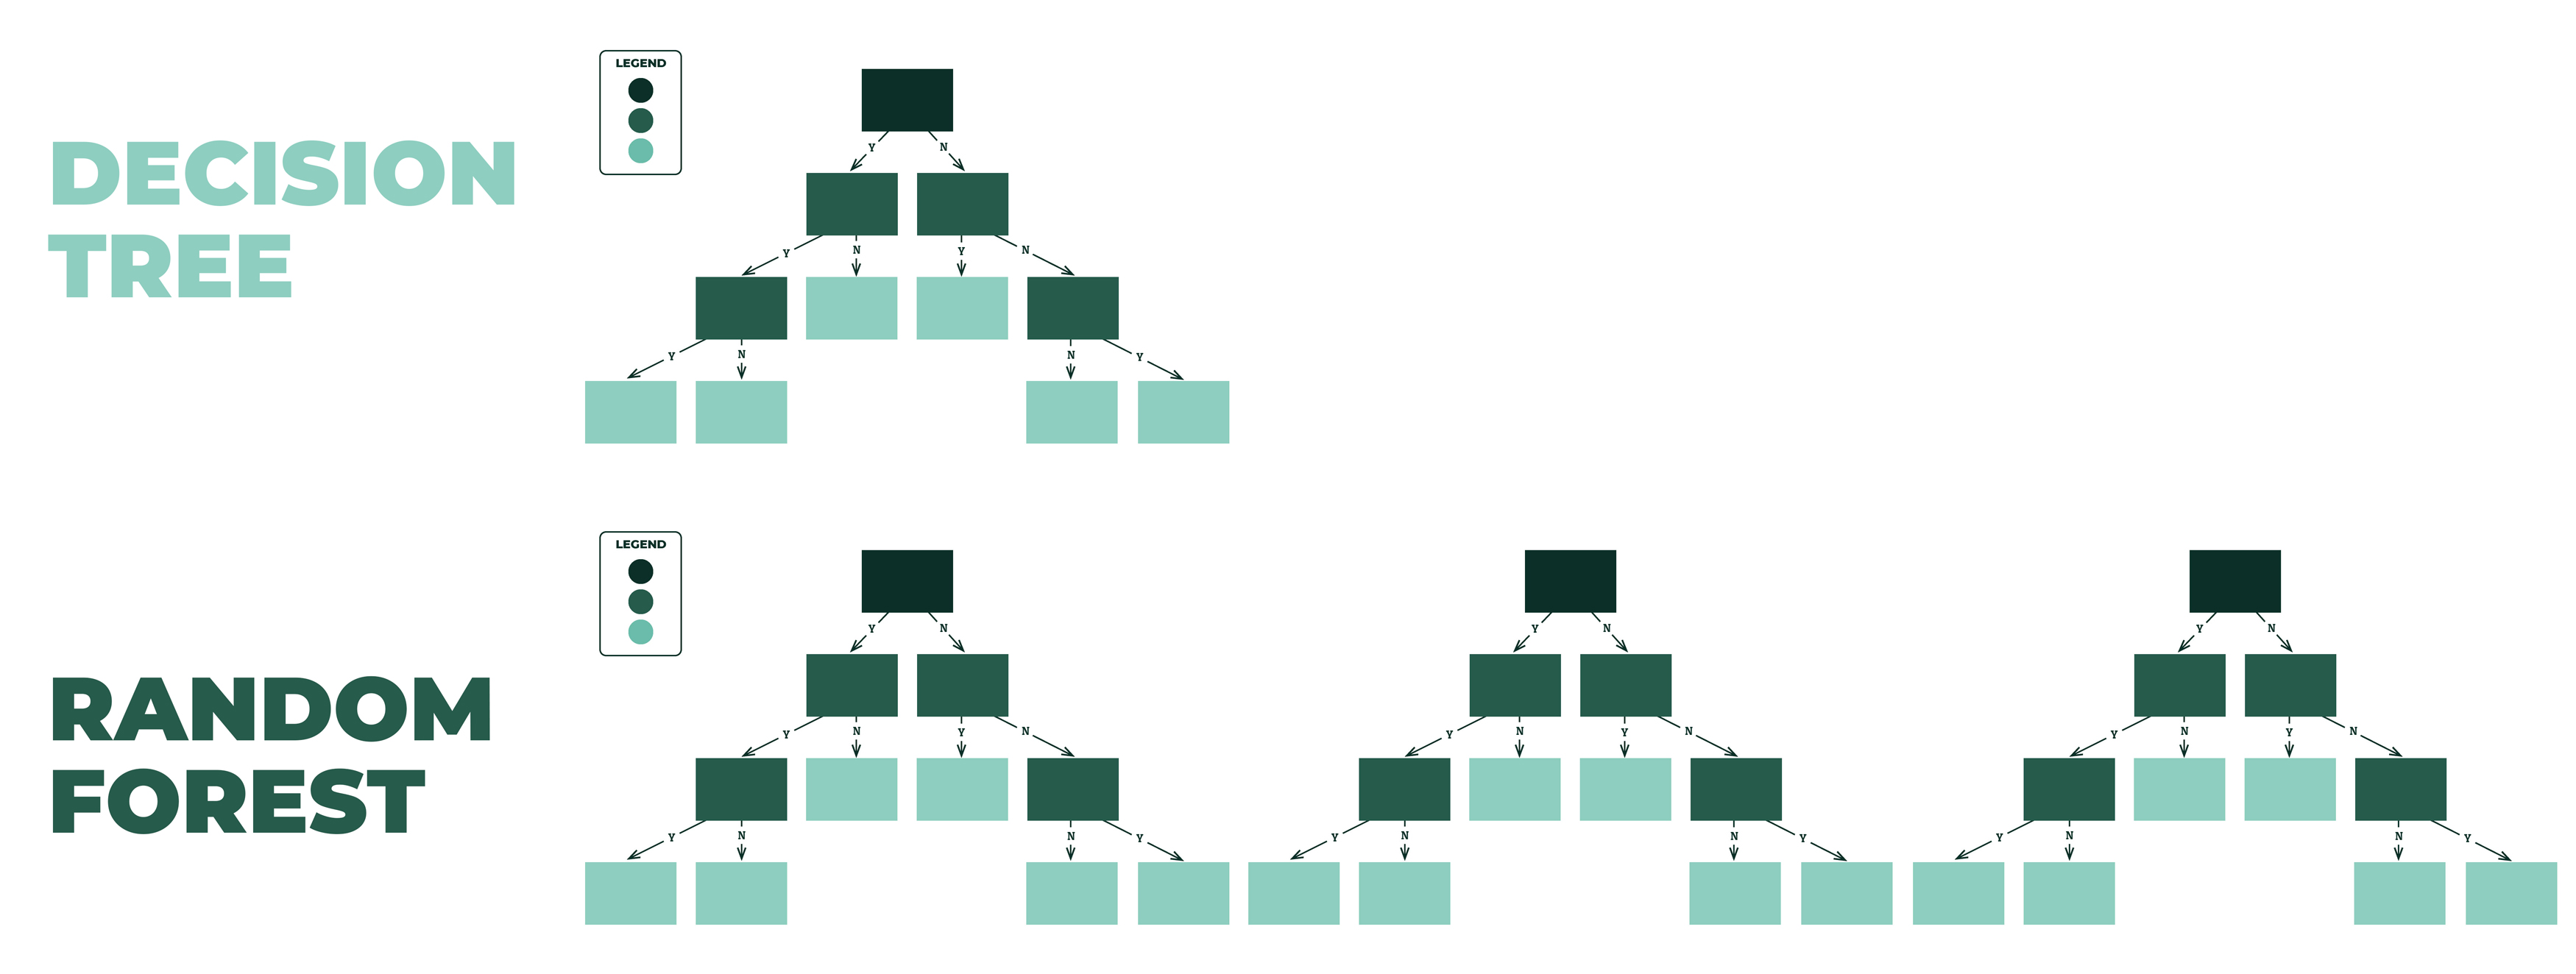

#### Mathematical computations behind Random Forest Algorithm
Essentialy, the prediction of the Random Forest is obtained by averaging the predictions of all individual decision trees $f_t$, where $T$ is the total number of decision trees in the forest, and $f_t(\mathbf{x})$ is the prediction of the $t$-th decision tree for the input vector $\mathbf{x}$. With this defined, the formula follows as: $f(x) = \frac{1}{T} \sum_{t=1}^T f_t(x)$

In [10]:
# create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on test data
y_pred = clf.predict(X_test)

# evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest:', accuracy)

Accuracy of Random Forest: 0.5191932335718933


#### Additional hyper-parameter modification in Random Forest Classification
In order to attempt to gain more accurate results, I decided to implement the max_depth hyperparameter and set to 20 which further increases the levels of decision trees within the forest. Also, implementing the max_features hyperparameter considers the amount of features or leafs on a particular tree. Along with this, I increased the n_estimators to 500 which adds to the total amount of trees in the forest.


In [11]:
# adjust hyper-parameters in Random Forest Method
clf = RandomForestClassifier(n_estimators=500, max_depth=20, max_features=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on test data
y_pred = clf.predict(X_test)

# evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of adjusted Random Forest:', accuracy)

Accuracy of adjusted Random Forest: 0.43558880936890043


##### Evaluation of hyper-parameter adjustment
Although the addition of hyper-parameters in the Random Forest model seemed to be beneficial as it increased possibilites within the method, we see that the accuracy of the model dropped by about 8%. This is a hard but realistic lesson to be learned since on the outside it seems that adding to the model should only assist in its accuracy, but in this case the model likely reached a place where more increased features and trees would only confused the predictions and decrease accuracy.

### Conclusion of Implemented Supervised Learning Models
As the universal method of testing accuracy was using the accuracy_score method from scikit learn's metrics module, which compares set training predictions to test data, I found that the Naive Bayes Classifier was the most accurate model with an accuracy percentage of about 56%. I feel that it is logical that such method outperforms the Random Forest at about 52% as the categorical grouping due to its probabilistic nature but its outperformance of Support Vector Machines (SVM) at about 54% comes as a suprise since I would expect the hyperplane calculations to be far more accurate. In summary, the hard truth of each model's accuracy being under 60% has proven that mathematical and statistical intution does not always lead to the best results in machine learning. Although these predictions may be challenging, my curiousity for learning more about complex models and strageties has grown and is something I very much look forward to.

## Unsupervised Learning
With the goal being analyzation of customer review data, I chose Latent Dirichlet Allocation (LDA) and K-Means clustering to attempt to extract insight from the reviews. The objective with LDA was to seperate different words into respective categories. While applying K-Means clustering, I wanted to place individual reviews into clusters which were similar within each other. Through this analysis, one may more easily view the common language being used to describe each hotel while being placed into groups.

### [Latent Dirichlet Allocation (LDA) ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
LDA is a probabilistic model used to organize search and summarize archives of text data. The overarching aim of the model is to used the words given to find topics which relate. Because of this, I felt that LDA's text organization strength could be of use in making sense of the review dataset. The code below depicts the idea: First fit the model using the alternate preprocessing method, then write a loop which writes words that the model catches into its respective category.

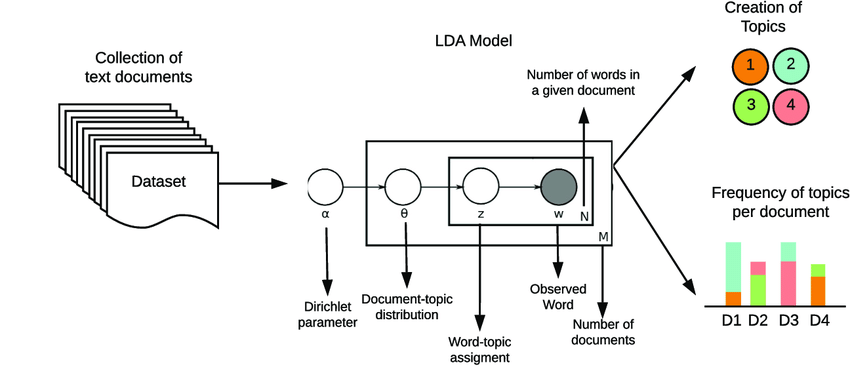

In [12]:
# apply Latent Dirichlet Allocation for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# print the top 10 words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Category %d:" % (topic_idx+1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-11:-1]]))


Category 1:
fantasic aprile henk breaksfast vaparetto desperatley bookit stuffiness jazzfest renovate
Category 2:
hotel room great good stay staff location nice rooms did
Category 3:
komaneka adaquate burbon okura av stagger habits denmark emporio bacco
Category 4:
claris matteo jimbaran misleading kodak tatty girona shula variation districts
Category 5:
silla altamont regencia hostal 42nd tsim preciados mong relation sha
Category 6:
hix letras za probs blissful merchant moet guestroom bullet azure
Category 7:
artus sanjay elan carmel pino bargellino scaletta endorse bejing atlantico
Category 8:
disapointing 2mins favourable hix mouffetard hav vist locality citadines rebooked
Category 9:
calzaiuoli apsis shinagawa degli orafi davanzati sitges reviewed guelfo cortez
Category 10:
fita gallo meurice carolina hopkins hans cristal littre paramount loes


#### Evaluation of LDA Application
In this case, the model groups words based of topics it finds to be similar. As we can see from the above output, at times LDA is successful in its grouping i.e. Category 2 which lists positive reviews, but other times the model fails to form english words. In response to this, I decided to use K-Means Clustering to cluster data into fewer parts. 

### K-Means Clustering
K-Means Clustering is an unsupervised learning algorithm which interprets individual data points by similarity and places them in groups known as clusters. The code chunk below depicts the general idea and application of the clustering in the case of hotel review data. First, loop through the clusters in a set range using silhouette score to determine the best possible amount of clusters to be created within the data. Then, use the K-means function on the clusters, and finally print reviews respective to its cluster.

From a mathematical perspective we can perform the following: 
Initialize $k$ centroids randomly: $c_i = x_i$ for $i = 1, \ldots, k$.
Repeat (a) and (b) until convergence:

a. Assign each data point to the nearest centroid: assign $x_i$ to $c_j$ if $j = \operatorname{argmin}j |x_i - c_j|^2$.

b. Update centroids: $c_i = \frac{1}{n_i} \sum{x_j \in S_i} x_j$ if $i \in {j: x_j \text{ is assigned to } c_i}$.

The algorithm converges when the centroids no longer change or a maximum number of iterations is reached. Below displays the idea of K-Means Clustering

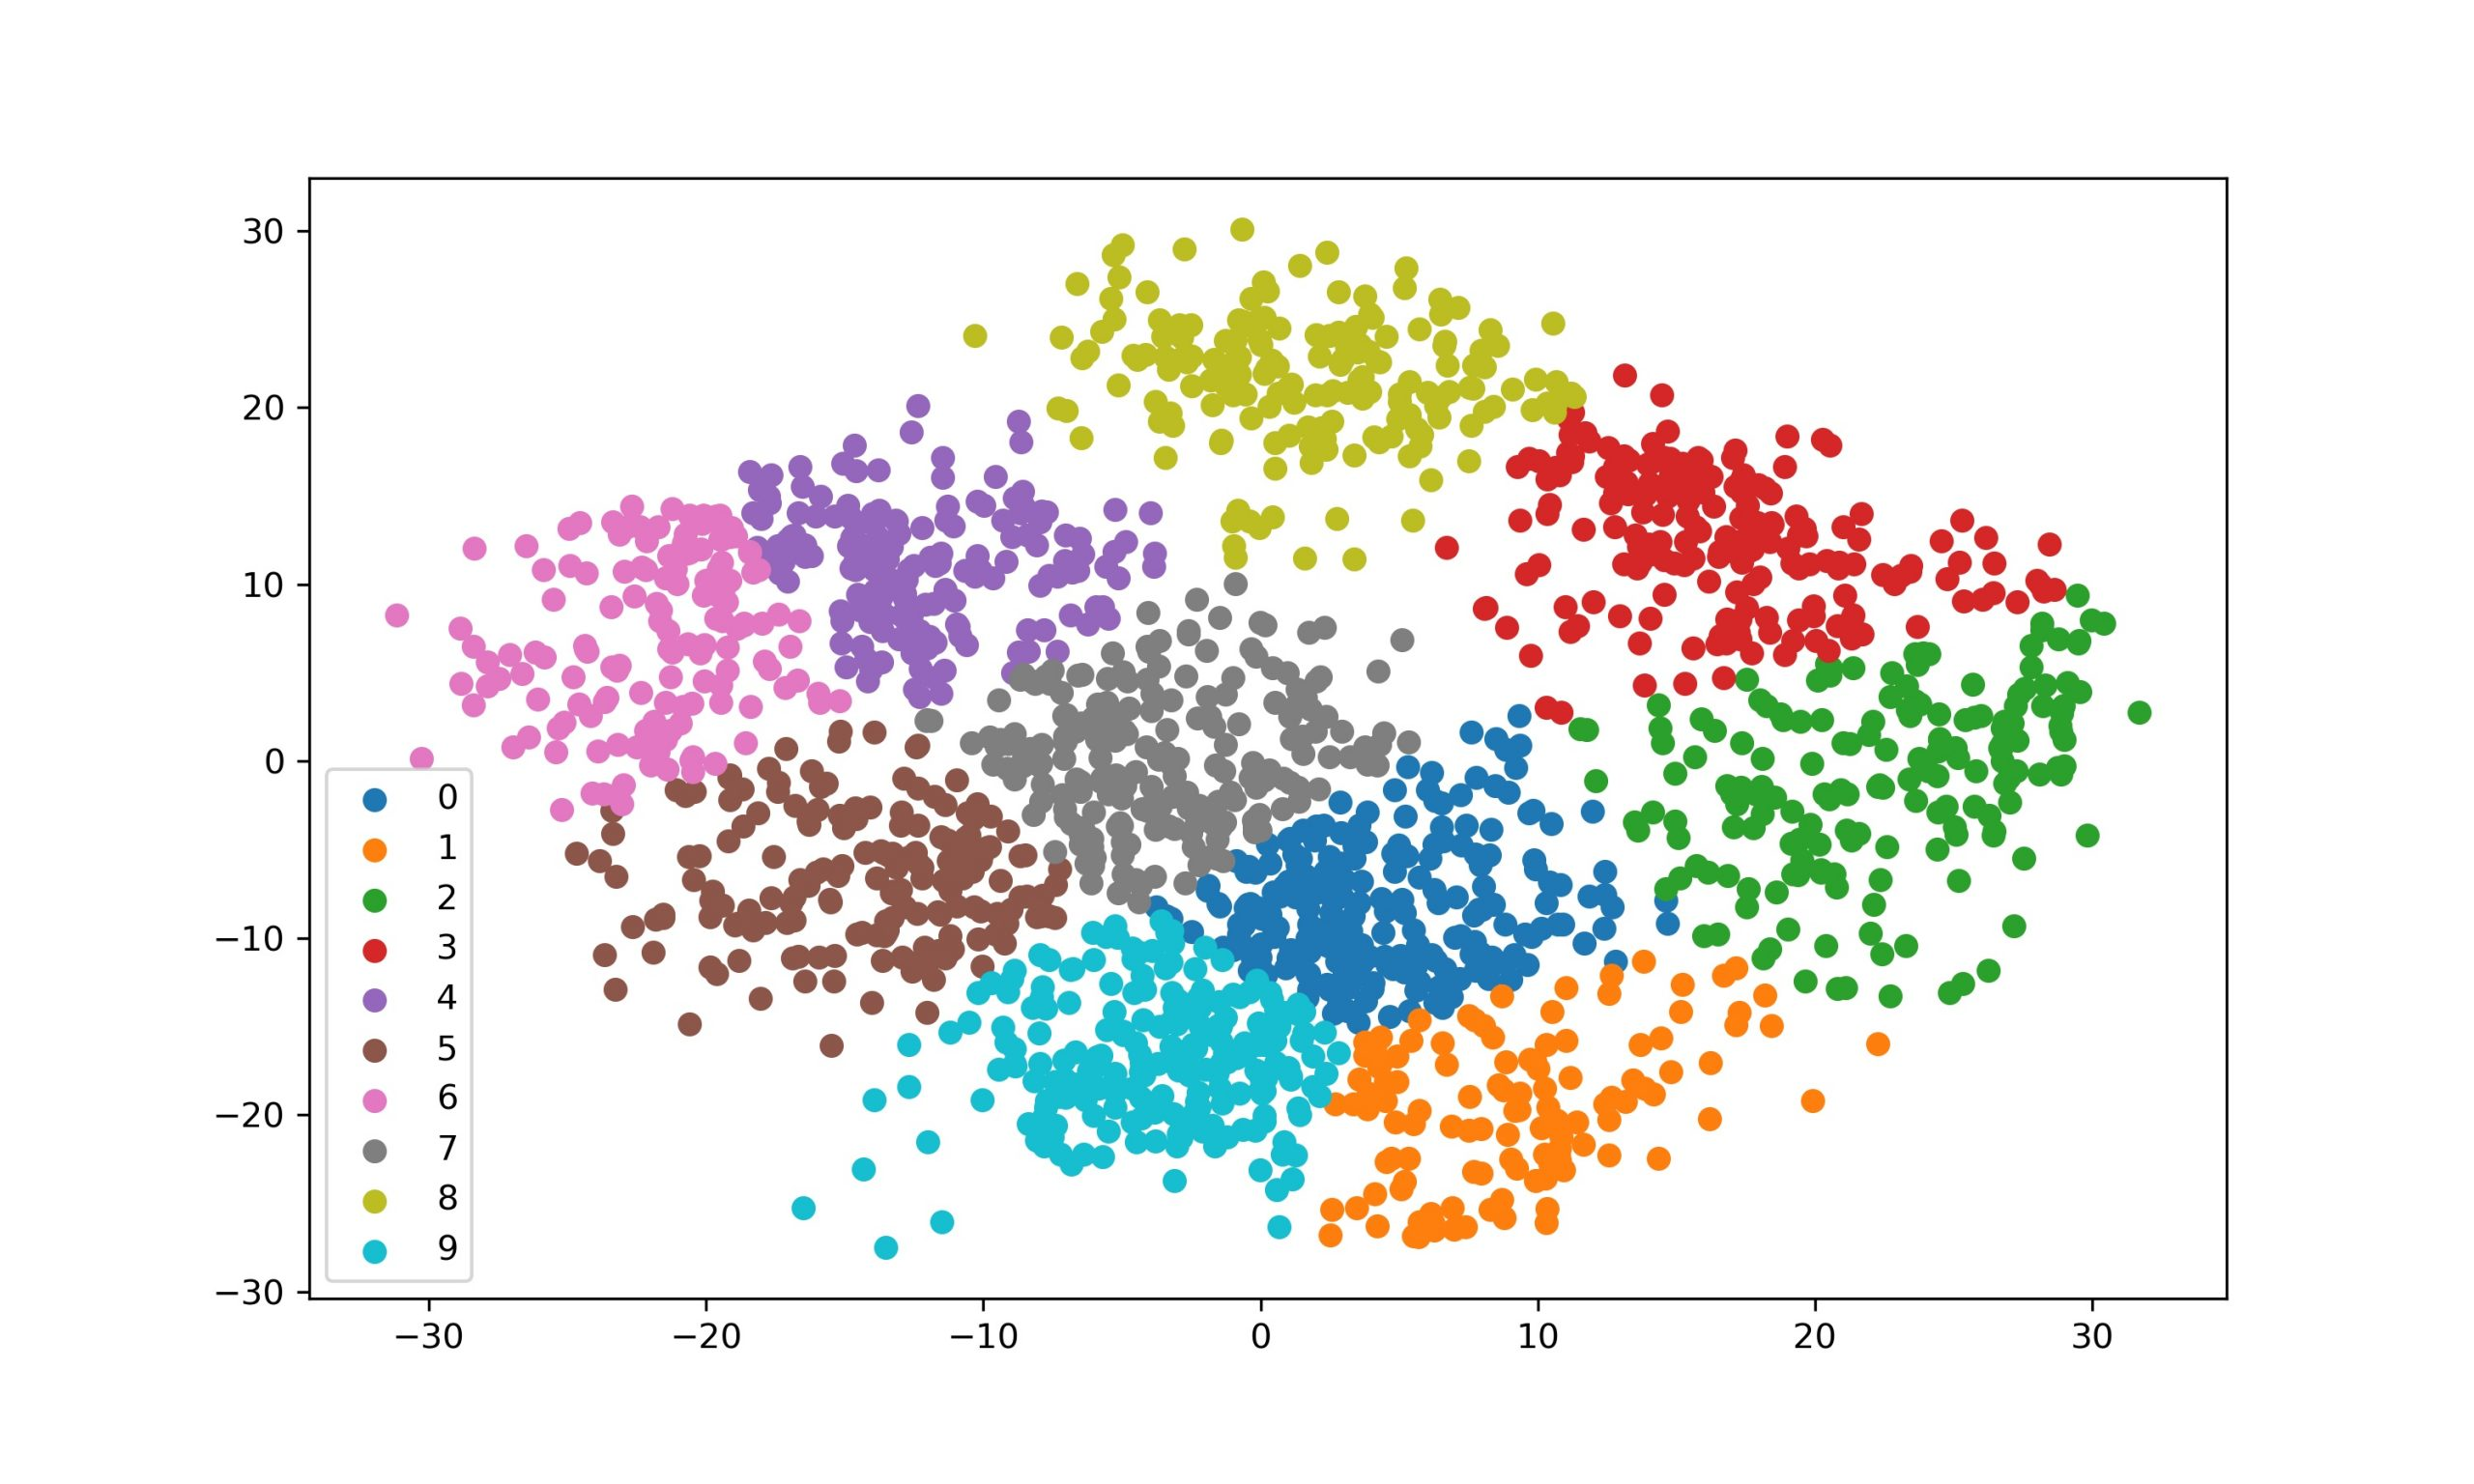

In [13]:
# determine the optimal number of clusters using silhouette score
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    sil_scores.append(sil_score)
optimal_n_clusters = sil_scores.index(max(sil_scores)) + 2

# apply K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# print the top reviews
for i in range(optimal_n_clusters):
    cluster_reviews = df['Review'][cluster_labels == i]
    print(f"Cluster {i+1}:\n{cluster_reviews.head()}\n")


/Users/marcmedina/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/marcmedina/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/marcmedina/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/marcmedina/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Cluster 1:
0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
Name: Review, dtype: object

Cluster 2:
300    not family place family wanted spend couple da...
312    beautiful view-disappointing service stayed ed...
487    sunshine just returned week trip dominican rep...
488      issues n't say 4 star service great pool bar,  
515    run, just returned 7 nights majestic elegance,...
Name: Review, dtype: object



### K-Means Clustering Analysis and Business Use
As one may immediately reconize, the K-Means Clustering technique immediately shows better performance over LDA due to its ability to clearly display insights. For example, the first cluster shows positive reviews contrasting to the second cluster which have seemingly less positive, possibly negative reviews. This sense of machine-learning based organization of hotel review data could prove to be extremely useful in navigating improvement of customer satisfaction. Although I restricted the top review counts for computational purposes, a business application can be to go through such clusters from the K-Means Model and depict the most common associations between a positive and negative experience. From this, management could make adjustments to counteract the bad and reinforce the good.

# Conclusion
In closing, the application of various machine-learning models both unsupervised and supervised have proven high-level significance. Because of algorithms such as K-Means Clustering and in this case, Multinomial Naive Bayes classifier I was able to make predictions based on elements of a customers review and displayed the power of the grouping elements based on similarities. Although these predictions weren't perfect, there will always be room to improve and models to build. Nevertheless, being able to conquer the real goal of gaining true business value is what is at the heart of this application of machine-learning and data science.